# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Youssef Mahmoud Mostafa

ID:58-9643

Tutorial: 09

---

Name: Jasmen elzarka

ID:58-7037

Tutorial:09

---

Name: Abdelaziz abouleil

ID:58-5885

Tutorial:09

---

The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

view frist 5 rows


In [ ]:

df.head()


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


Check Dat Typs and non null counts

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


Numerical Statistics

In [ ]:
df.describe()

,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000


Check Missing Values for each Column

In [ ]:
df.isnull().sum()

,0
Building_ID,0
Building_Type,110
Governorate,227
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0
Average_Temperature,110


Check missing values for each row

In [ ]:
df.isnull().sum(axis=1)

,0
0,0
1,1
2,0
3,2
4,0
...,...
1095,0
1096,1
1097,0
1098,0


Save Boolean Mask to each variable

In [ ]:
missing = df.isnull().sum(axis=1) > 0
missing

,0
0,False
1,True
2,False
3,True
4,False
...,...
1095,False
1096,True
1097,False
1098,False


Shows thr rows and it's info of which have missing values


In [ ]:
df[missing]

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
5,BLD-1005-VX,Commercial,NaN,%9New Cairo,SunDay,Low,Medium,37377m2,2022-07-31,37.54,4687.67 kWh
9,BLD-1009-CG,Residential,NaN,=Mohandessin10,FRIDAY,Medium,High,17467,2023-01-14,33.18,3419.13 kWh
12,BLD-1012-RG,NaN,Cairo,Heliopolis$34,THURSDAY,High,Medium,19139,2020-02-24,35.86,4070.21 kWh
...,...,...,...,...,...,...,...,...,...,...,...
1087,BLD-2087-ZF,Industrial,NaN,)6Smouha,sunDAY,Low,Low,9684,2023-02-06,30.01,3127.82 kWh
1090,BLD-2090-LV,Residential,NaN,Gleem@0,monday,Low,Low,31178,2023-09-08,30.62,3451.58 kWh
1092,BLD-2092-OT,Residential,NaN,#Heliopolis65,WednesDay,High,Low,34160,2024-01-16,36.56,3830.68 kWh
1093,BLD-2093-JY,NaN,Giza,Mohandessin,Saturday,High,High,2091m2,2024-11-10,36.12,4250.29 kWh


Visual of a boxplot to show outliers

<Axes: >

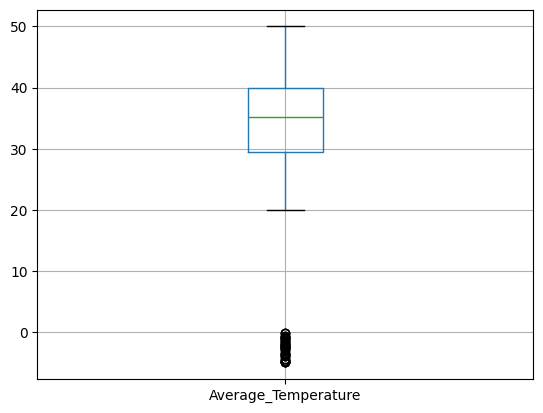

In [ ]:
df.boxplot()

Identifies Categories

In [ ]:
df["Building_Type"].value_counts()

,count
Building_Type,
Residential,349
Commercial,325
Industrial,316


In [ ]:
df["Governorate"].value_counts()

,count
Governorate,
Alexandria,310
Giza,293
Cairo,270


In [ ]:

df["Occupancy_Level"].value_counts()

,count
Occupancy_Level,
High,368
Low,368
Medium,364


In [ ]:
df["Neighborhood"	].value_counts()

,count
Neighborhood,
Smouha,45
Gleem,44
Dokki,41
Mohandessin,38
New Cairo,32
...,...
%Smouha42,1
+Maadi7,1
^Dokki97,1


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

changing squarefootage to be float data type and removing m2

In [ ]:
df['SquareFootage'] = df['SquareFootage'].str.replace('m2', '').astype(float)

In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063.0,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372.0,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255.0,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265.0,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375.0,2022-08-12,28.82,3279.17 kWh


Make sure that the square footage is now a float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   float64
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(2), object(9)
memory usage: 94.7+ KB


Changes the value type of energy consumption from a object into a float

In [ ]:
df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace('kWh', '').str.strip()
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   float64
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   float64
dtypes: float64(3), object(8)
memory usage: 94.7+ KB


In [ ]:
df.head()


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063.0,2020-01-01,28.61,2713.95
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372.0,2022-02-24,NaN,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255.0,2021-02-22,37.88,4101.24
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265.0,2023-07-30,35.06,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375.0,2022-08-12,28.82,3279.17


removes in discrepencies from the value of neighborhood , removes extra characters

In [ ]:
df['Neighborhood'] = df['Neighborhood'].astype(str).str.replace(r'[+0-9=*%()]', '', regex=True).str.strip()

In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063.0,2020-01-01,28.61,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,tuesDAY,High,High,44372.0,2022-02-24,NaN,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255.0,2021-02-22,37.88,4101.24
3,BLD-1003-HE,NaN,NaN,Dokki,TuesDay,Low,High,13265.0,2023-07-30,35.06,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375.0,2022-08-12,28.82,3279.17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   float64
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   float64
dtypes: float64(3), object(8)
memory usage: 94.7+ KB


standardize the capitlization of the letters of day of the week

In [ ]:
df['Day_of_Week'] = df['Day_of_Week'].str.capitalize()


standardizes the values to be wtitten the same way

In [ ]:
df['Building_Type'] = df['Building_Type'].str.title()

In [ ]:
df['Governorate'] = df['Governorate'].str.title()

In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063.0,2020-01-01,28.61,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372.0,2022-02-24,NaN,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255.0,2021-02-22,37.88,4101.24
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,13265.0,2023-07-30,35.06,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375.0,2022-08-12,28.82,3279.17


In [ ]:
median_temp = df['Average_Temperature'].median()
df['Average_Temperature'] = df['Average_Temperature'].fillna(median_temp)

In [ ]:
print(df['Average_Temperature'].isnull().sum())

0


In [ ]:
mode_building_type = df['Building_Type'].mode()[0]
df['Building_Type'] = df['Building_Type'].fillna(mode_building_type)

In [ ]:
print(df['Building_Type'].isnull().sum())

0


In [ ]:
mode_governorate = df['Governorate'].mode()[0]
df['Governorate'] = df['Governorate'].fillna(mode_governorate)

In [ ]:
print(df['Governorate'].isnull().sum())

0


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

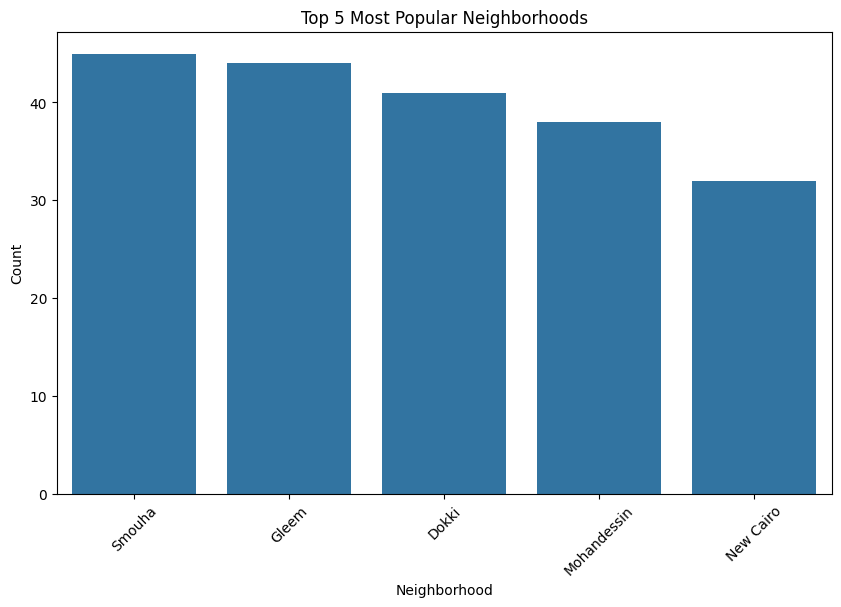

Top 5 Most Popular Neighborhoods:
Neighborhood
Smouha         45
Gleem          44
Dokki          41
Mohandessin    38
New Cairo      32
Name: count, dtype: int64


In [38]:
neighborhood_counts = df["Neighborhood"].value_counts()
top_5_neighborhoods = neighborhood_counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_neighborhoods.index, y=top_5_neighborhoods.values)
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Top 5 Most Popular Neighborhoods")
plt.show()

print("Top 5 Most Popular Neighborhoods:")
print(top_5_neighborhoods)

**Answer for Q1:** _Your answer here_

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

**Answer for Q2:** _Your answer here_

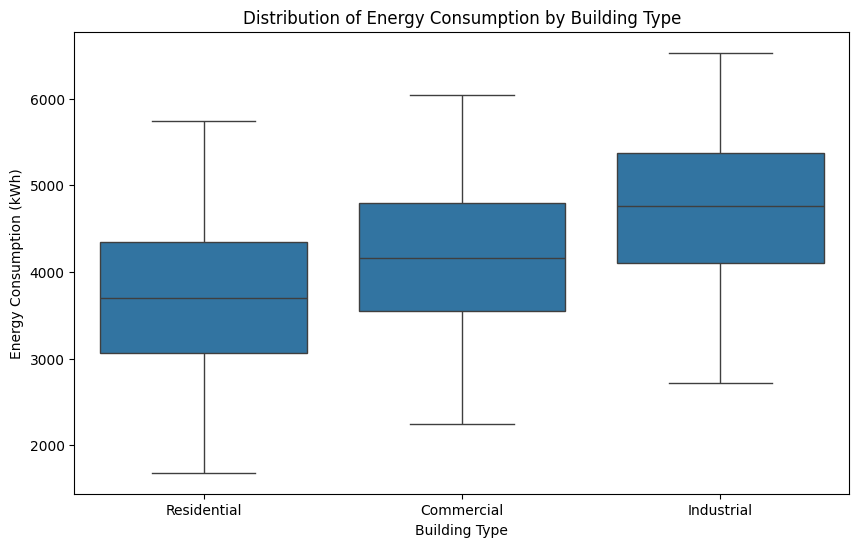


Numerical Distribution of Energy Consumption by Building Type:


,count,mean,std,min,25%,50%,75%,max
Building_Type,,,,,,,,
Commercial,325.0,4170.374462,809.695114,2241.96,3554.190,4157.81,4798.2500,6042.56
Industrial,316.0,4708.418671,818.158005,2724.82,4100.835,4760.64,5373.5125,6530.60
Residential,349.0,3679.396934,833.337177,1683.95,3060.910,3694.52,4346.1600,5746.40


In [39]:
df['Energy_Consumption_numeric'] = df['Energy_Consumption'].str.replace(' kWh', '', regex=False).astype(float)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Building_Type', y='Energy_Consumption_numeric', data=df)
plt.xlabel("Building Type")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Distribution of Energy Consumption by Building Type")
plt.show()

print("\nNumerical Distribution of Energy Consumption by Building Type:")
display(df.groupby('Building_Type')['Energy_Consumption_numeric'].describe())

**Q3:** How does the building size affect energy consumption?

**Visualization**

**Answer for Q3:** _Your answer here_

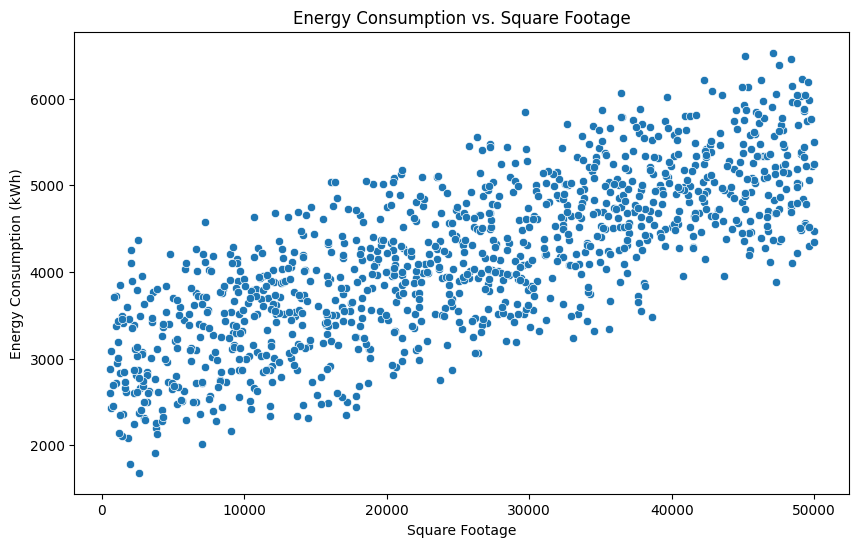


Correlation between Square Footage and Energy Consumption: 0.77


In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFootage', y='Energy_Consumption_numeric', data=df)
plt.xlabel("Square Footage")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption vs. Square Footage")
plt.show()

correlation = df['SquareFootage'].corr(df['Energy_Consumption_numeric'])
print(f"\nCorrelation between Square Footage and Energy Consumption: {correlation:.2f}")

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

**Answer for Q4:** _Your answer here_

In [35]:
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'])
display(df.head())

latest_maintenance_date = df['Last_Maintenance_Date'].max()
df['Days_Since_Last_Maintenance'] = (latest_maintenance_date - df['Last_Maintenance_Date']).dt.days
display(df[['Last_Maintenance_Date', 'Days_Since_Last_Maintenance']].head())

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Energy_Consumption_numeric,Days_Since_Last_Maintenance
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063.0,2020-01-01,28.61,2713.95 kWh,2713.95,1826
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372.0,2022-02-24,35.26,5744.99 kWh,5744.99,1041
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255.0,2021-02-22,37.88,4101.24 kWh,4101.24,1408
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265.0,2023-07-30,35.06,3009.14 kWh,3009.14,520
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375.0,2022-08-12,28.82,3279.17 kWh,3279.17,872


,Last_Maintenance_Date,Days_Since_Last_Maintenance
0,2020-01-01,1826
1,2022-02-24,1041
2,2021-02-22,1408
3,2023-07-30,520
4,2022-08-12,872


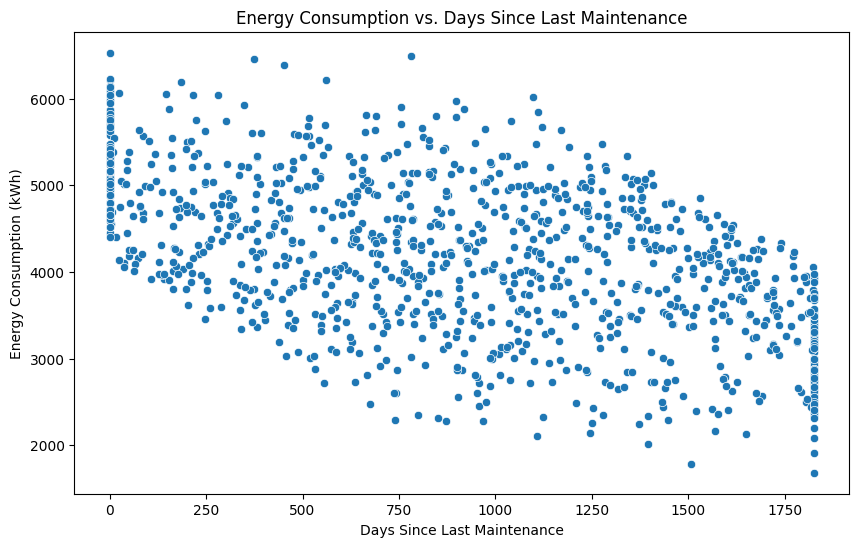


Correlation between Days Since Last Maintenance and Energy Consumption: -0.55


In [36]:
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'])

latest_maintenance_date = df['Last_Maintenance_Date'].max()
df['Days_Since_Last_Maintenance'] = (latest_maintenance_date - df['Last_Maintenance_Date']).dt.days

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days_Since_Last_Maintenance', y='Energy_Consumption_numeric', data=df)
plt.xlabel("Days Since Last Maintenance")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption vs. Days Since Last Maintenance")
plt.show()

correlation = df['Days_Since_Last_Maintenance'].corr(df['Energy_Consumption_numeric'])
print(f"\nCorrelation between Days Since Last Maintenance and Energy Consumption: {correlation:.2f}")

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

**Answer for Q5:** _Your answer here_

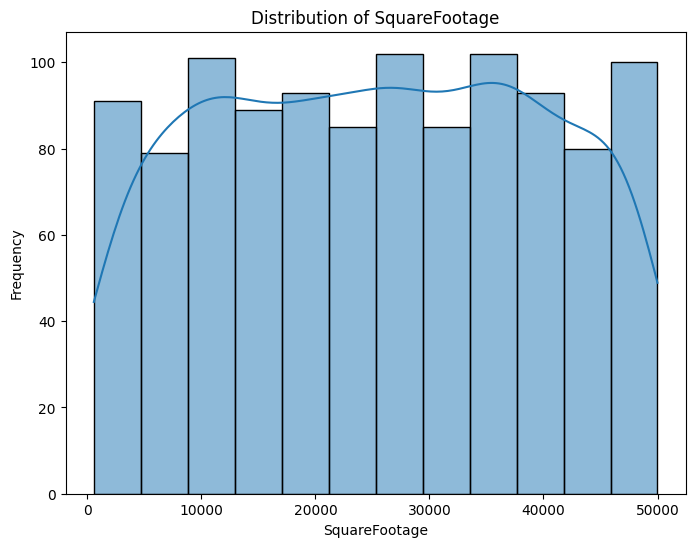

Skewness of SquareFootage: -0.01



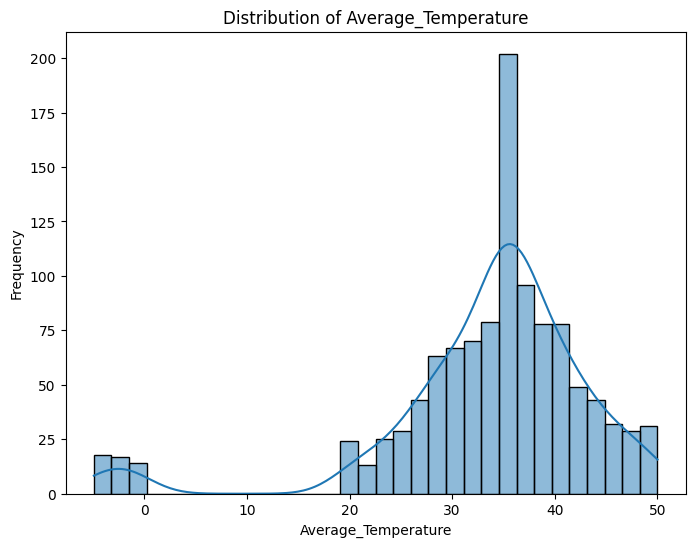

Skewness of Average_Temperature: -1.84



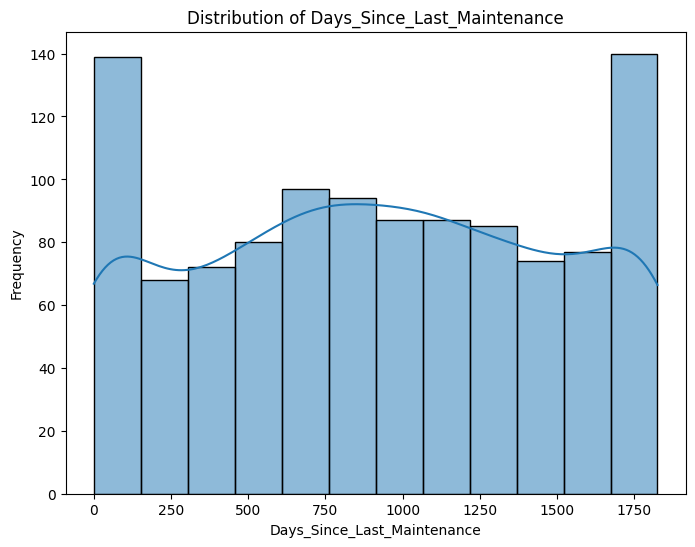

Skewness of Days_Since_Last_Maintenance: -0.02



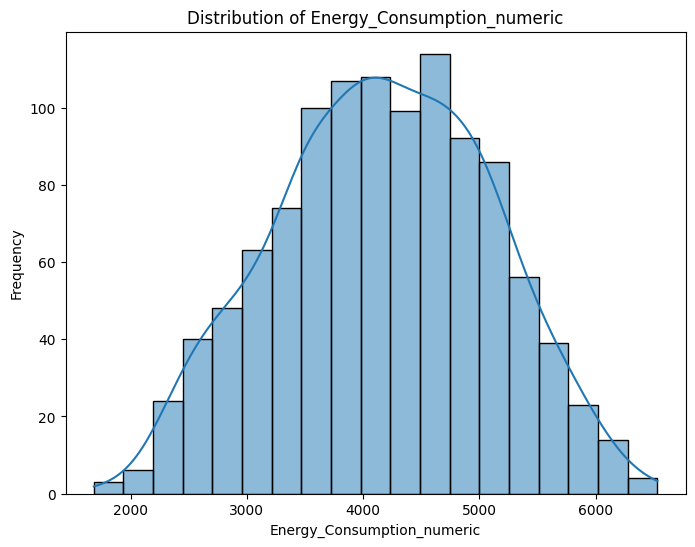

Skewness of Energy_Consumption_numeric: -0.06



In [42]:
numerical_cols = ['SquareFootage', 'Average_Temperature', 'Days_Since_Last_Maintenance', 'Energy_Consumption_numeric']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness:.2f}\n")

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

**Answer for Q6:** _Your answer here_

Multicollinearity occurs in a multiple regression model when two or more predictor variables are highly correlated with each other.

Why is it a problem for linear regression?

Unreliable Coefficient Estimates: Multicollinearity makes it difficult to determine the individual impact of each correlated predictor variable on the dependent variable. The estimated coefficients can be unstable and highly sensitive to small changes in the data.
Inflated Standard Errors: The standard errors of the regression coefficients increase with multicollinearity. This can lead to wider confidence intervals and make it harder to reject the null hypothesis (that the coefficient is zero), potentially causing you to incorrectly conclude that a predictor is not statistically significant.
Difficulty in Model Interpretation: It becomes challenging to interpret the meaning of the regression coefficients when predictors are highly correlated, as their effects are intertwined.
Does this problem exist in this dataset?

To check for multicollinearity in this dataset, we can examine the correlation matrix of the numerical independent variables and calculate Variance Inflation Factors (VIFs). High correlation coefficients and high VIF values (typically above 5 or 10) indicate the presence of multicollinearity.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation

Evaluate the model you applied.

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.